In [ ]:
# !pip install netCDF4
# !pip install cartopy

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.animation as animation
from matplotlib.colors import ListedColormap
import cartopy.crs as ccrs
import cartopy.feature as cfeature
import xarray as xr
plt.rc('font', family='Malgun Gothic')
plt.rcParams['axes.unicode_minus']=False

In [3]:
# 1. NetCDF 파일 불러오기
ds = xr.open_dataset('../Data/nhsce_v01r01_19661004_20250331.nc')

In [4]:
# 2. 눈덮임 데이터
raw_snow = ds['snow_cover_extent']
lat = ds['latitude']
lon = ds['longitude']

In [5]:
# 색상 지정: [0 → 투명, 1 → 파란색, -127 → 빨간색]
cmap = ListedColormap(['none', 'blue', 'red'])

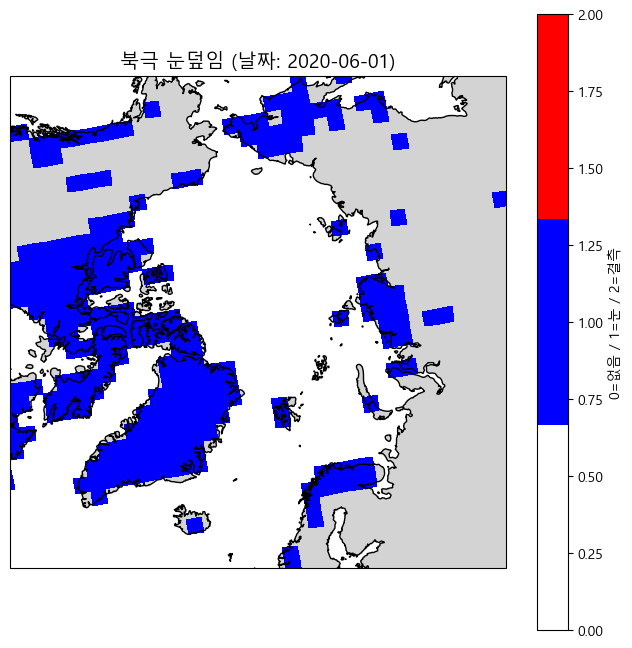

In [6]:
date_str = '2020-06-01'

# 날짜별 눈덮임 데이터 선택
data = raw_snow.sel(time=date_str).values.astype(float)

# 값 매핑: -127 → 2 (결측), 1 → 1 (눈), 0 → 0 (없음)
data[data == -127] = 2

# 시각화
fig = plt.figure(figsize=(8, 8))
ax = plt.axes(projection=ccrs.NorthPolarStereo())
ax.set_extent([-180, 180, 60, 90], crs=ccrs.PlateCarree())
ax.coastlines()
ax.add_feature(cfeature.LAND, facecolor='lightgray')

img = ax.pcolormesh(
    lon, lat, data,
    transform=ccrs.PlateCarree(),
    cmap=cmap,
    vmin=0, vmax=2
)

plt.title(f"북극 눈덮임 (날짜: {date_str})", fontsize=14)
plt.colorbar(img, ax=ax, label="0=없음 / 1=눈 / 2=결측")
plt.show()

In [7]:
# 프레임 리스트 만들기
frames = []
times = []

# 1968~1970년 기간 선택
time_range = raw_snow.sel(time=slice('1969-01-01', '1970-12-31')).time

for t in time_range:
    data = raw_snow.sel(time=t).values.astype(float)
    # -127 → 2 (결측), 1 → 1 (눈), 0 → 0 (없음)
    data[data == -127] = 2
    frames.append(data)
    times.append(str(np.datetime_as_string(t.values, unit='D')))

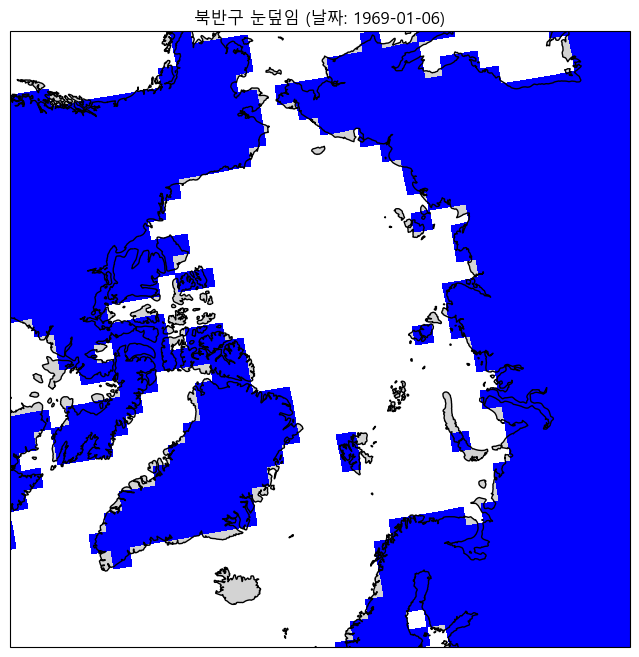

In [8]:
# 6. 애니메이션 그리기
fig = plt.figure(figsize=(8, 8))
ax = plt.axes(projection=ccrs.NorthPolarStereo())
ax.set_extent([-180, 180, 60, 90], crs=ccrs.PlateCarree())
ax.coastlines()
ax.add_feature(cfeature.LAND, facecolor='lightgray')
title = ax.set_title("")

mesh = None
def update(frame_idx):
    global mesh
    if mesh:
        mesh.remove()
    mesh = ax.pcolormesh(
        lon, lat, frames[frame_idx],
        transform=ccrs.PlateCarree(),
        cmap=cmap,
        vmin=0, vmax=2
    )
    title.set_text(f"북반구 눈덮임 (날짜: {times[frame_idx]})")
    return mesh, title

ani = animation.FuncAnimation(fig, update, frames=len(frames), interval=200)

In [9]:
# 7. GIF 저장
ani.save("북극_눈덮임_애니메이션_1969_1970.gif", writer='pillow')